## Multiclass Perceptron

#### Load libraries

In [2]:
library(ggplot2) # plotting
library(reshape2) # melt function
library(repr) # setting options
library(tidyr)

**I. Load Datasets**

In [2]:
# read data
train_data <- read.csv('Data//1D_train.csv')
test_data <- read.csv('Data//1D_test.csv')

# number of features
D <- 4

train.len <- dim(train_data)[1]
test.len <- dim(test_data)[1]

# separate labels and features from data set
train.index <- sample(1:train.len,train.len)
train.data <- train_data[train.index,  1:D]
train.label <- train_data[train.index, 'y']
test.data <- test_data[, 1:D]
test.label <- test_data[, 'y']

**MLP Implementation**

In [3]:
pred.class <- function(phi, W){
    return (max.col(t(W %*% t(phi))))
}

In [4]:
## Basis function
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0
T_train <- ifelse(train.label == 'C1',1,ifelse(train.label=='C2',2,3))
T_test <- ifelse(test.label == 'C1',1,ifelse(test.label=='C2',2,3))

test.data  <- as.matrix(cbind(1, test.data))

# Initialization
eta <- 0.01 #learning rate
epsilon <- 0.001 # Stopping criterion
tau.max <- 100# Maximum number of iterations

# Initialise the weight vector randomly 
W  <- rbind(runif(ncol(Phi)),
            runif(ncol(Phi)),
            runif(ncol(Phi)))

tau <- 1 # iteration counter 
terminate <- FALSE # termination status
error_count  <- data.frame(error=0)

In [5]:
test.error <- data.frame(matrix(ncol = 0, nrow = 0))

In [6]:
# index to store error of every 5 batches
t <- 1
while(!terminate){ # while not converged do ...
    # reshuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    train.set<- Phi[train.index,]
    T <- T_train[train.index]

    
    for (i in 1:train.len){
        # break loop when reaching max iteration
        if (tau == tau.max) {break}
           
        # predict 
        T.pred  <- pred.class(train.set[i,,drop=F], W)
        
        # when prediciton is not equal to true label
        if (T.pred != T[i]){
            # reduce weights accordingly
            if (T.pred == 1){
                W[1,]  <- W[1,] - eta * train.set[i,,drop=F]
            } else if (T.pred == 2){
                W[2,]  <- W[2,] - eta * train.set[i,,drop=F]
            } else if (T.pred == 3){
                W[3,]  <- W[3,] - eta * train.set[i,,drop=F]
            }
            
            # increase weights accordingly
            if (T[i] == 1){
                W[1,]  <-  W[1,] + eta * train.set[i,,drop=F]
            } else if (T[i] == 2){
                W[2,]  <-  W[2,] + eta * train.set[i,,drop=F]
            } else if (T[i] == 3){
                W[3,]  <-  W[3,] + eta * train.set[i,,drop=F]
            }                                          
        }   
        # calculate training error
        error_count[tau,"eta = 0.01"]  <-  sum(pred.class(train.set, W) != T)/train.len
        
        # make predictions every 5 training data points
        # mini batch
        if (i%%5==0) {
            # error after every 5 batches updated
            test.error[t,"eta = 0.01"]  <- sum(pred.class(test.data, W)!= T_test)/test.len
            t <- t + 1
        }
        
    # increase iteration counter    
    tau  <- tau + 1
    # decreasing eta value    
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max 
    if (tau > 2) {
        terminate <- abs(error_count[tau - 1,"eta = 0.01"] - error_count[tau - 2,"eta = 0.01"]) < epsilon
    }
 
}}

# merge testing errors into placeholder
test.error  <- cbind(data.frame(mini_batch=1:nrow(test.error))*5,test.error)

### $\eta= 0.09$

In [7]:
## Basis function
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

# Initialization
eta <- 0.01 #learning rate
tau.max <- 100# Maximum number of iterations

# Initialise the weight vector randomly 
W  <- rbind(runif(ncol(Phi)),
            runif(ncol(Phi)),
            runif(ncol(Phi)))

tau <- 1 # iteration counter 
terminate <- FALSE # termination status
error_count  <- data.frame(error=0)

In [8]:
# index to store error of every 5 batches
t <- 1
while(!terminate){ # while not converged do ...
    # reshuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    train.set<- Phi[train.index,]
    T <- T_train[train.index]

    for (i in 1:train.len){
        # break loop when reaching max iteration
        if (tau == tau.max) {break}
           
        # predict 
        T.pred  <- pred.class(train.set[i,,drop=F], W)
        
        # when prediciton is not equal to true label
        if (T.pred != T[i]){
            # reduce weights accordingly
            if (T.pred == 1){
                W[1,]  <- W[1,] - eta * train.set[i,,drop=F]
            } else if (T.pred == 2){
                W[2,]  <- W[2,] - eta * train.set[i,,drop=F]
            } else if (T.pred == 3){
                W[3,]  <- W[3,] - eta * train.set[i,,drop=F]
            }
            
            # increase weights accordingly
            if (T[i] == 1){
                W[1,]  <-  W[1,] + eta * train.set[i,,drop=F]
            } else if (T[i] == 2){
                W[2,]  <-  W[2,] + eta * train.set[i,,drop=F]
            } else if (T[i] == 3){
                W[3,]  <-  W[3,] + eta * train.set[i,,drop=F]
            }                                          
        }   
        # calculate training error
        error_count[tau,"eta = 0.09"]  <-  sum(pred.class(train.set, W) != T)/train.len
        
        # make predictions every 5 training data points
        # mini batch
        if (i%%5==0) {
            # error after every 5 batches updated
            test.error[t,"eta = 0.09"]  <- sum(pred.class(test.data, W)!= T_test)/test.len
            t <- t + 1
        }
        
    # increase iteration counter    
    tau  <- tau + 1
    # decreasing eta value    
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max 
    if (tau > 2) {
        terminate <- abs(error_count[tau - 1,"eta = 0.09"] - error_count[tau - 2,"eta = 0.09"]) < epsilon
    }
 
}}

**Lets Train two multiclass perceptron models on the provided training data by setting the learning rates η to .09 and .01 respectively. For each model, we will evaluate the error of the model on the test data, after processing every 5 training data points (mini-batch).**

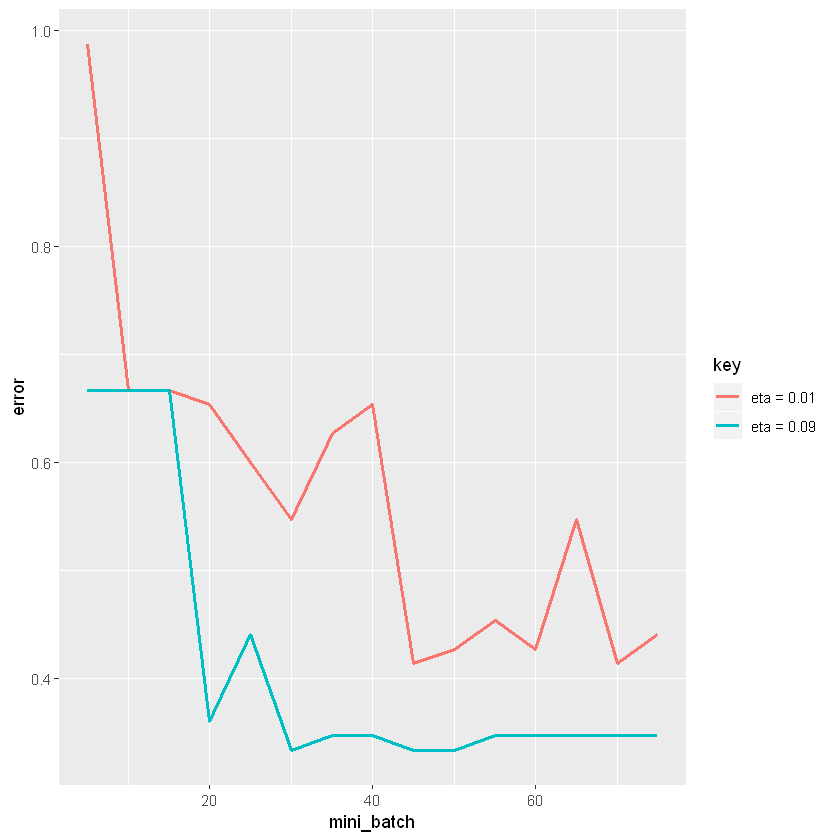

In [119]:
# plot for different learning rates
test.error %>%
    gather(key,error, "eta = 0.01", "eta = 0.09") %>%
    ggplot(aes(x=mini_batch, y=error, colour=key)) +
    geom_line(size=1)

From the above graph, we can see that the testing error fluctuates a lot when learning rate is smaller. When learning rate is lower, it takes more time to converge which is evident in the plot. When learning rate increases (eta=0.09), the graph converges faster and reaches local minima faster (compared with eta=0.01).

We see from the above plot that after around 30 mini-batches, the error has reached minimum and remains almost constant in case of **learning rate = 0.09** while it fluctuates in case of **learning rate = 0.01** and does not become steady.

Although this claims are not true for all data, as it is a hyper parameter which needs to be tuned with rigorous experiments on data.